<a style='color:#6698FF'>
## How Much Gold Would Push You Into a War? </a>

### Libraries

In [27]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import time

### Functions

In [ ]:
## INTERSECTION POINT OF TWO LINES
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    
    return x

In [139]:
## GAME THEORY SIMULATION
def Game_Theory(step=0.01, loops=5, sims=100000, cutoff=1):
    start_time = time.time()  

    x=range(0,loops)
    for m in x:
        color = ['b','g','y','orange','r']
        A_List = np.arange(step,1+step,step)
        Peace_Sims = []
        War_Sims = []
        Total_Sims = []
        for A in A_List:
            Peace = []
            War = []
            for i in range(0,sims):
                B = random.random()

                if B > cutoff: Peace.append(0)
                else: Peace.append(1)

                if A>B: War.append(2)
                else: War.append(0)

            Peace_Sims.append(sum(Peace) / float(len(Peace)))
            War_Sims.append(sum(War) / float(len(War)))

        if m==max(x): 
            plt.plot(A_List, War_Sims, c='black', label="War")
            plt.plot(A_List, Peace_Sims, c=color[m], label = "Peace")
        else:
            for n in range(0,len(War_Sims)):
                Total_Sims.append(max(Peace_Sims[n], War_Sims[n]))
            plt.plot(A_List, Total_Sims, c=color[m], label = "Cutoff: %0.3f" %(cutoff))


        A = [0, min(War_Sims)]
        B = [1, max(War_Sims)]
        C = [0, min(Peace_Sims)]
        D = [1, max(Peace_Sims)]
        cutoff =  line_intersection((A, B), (C, D))

    plt.legend(loc=2,prop={'size':8})
    plt.xlabel('Strength of Country A')
    plt.ylabel('Expected Gold (trillions)')
    
    plt.show()
        
    #Print out the runtime for the function
    print "Runtime: %0.2f seconds" %(time.time() - start_time)

## Solution

**Both countries would always choose war**

For starters, lets assume both countries are rational and want to maximize their gold. They will work out a rational simulation of what would play out based on the strategies they choose.

Let's assume for our first iteration that both countries will choose the same option, regardless of their strength. If country A chooses peace, country B will choose peace as well. Same for war. In this scenario, A is guaranteed a payout of 1 trillion in the Peace scenario. In the War scenario, A will make more than 1 trillion (on average) if its randomly selected strength is greater than 0.5, and make less than 1 trillion if its strength is less than 0.5.

Based on this analysis, A decides it should always go to war if its strength is greater than 0.5

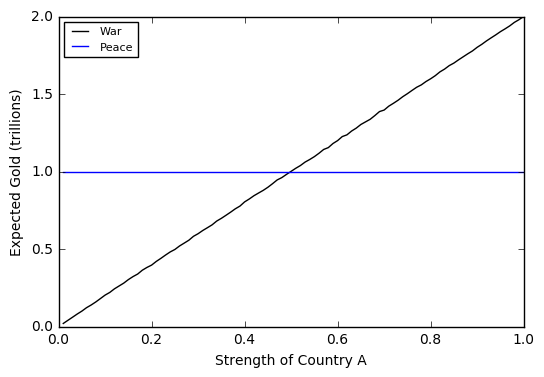

Runtime: 6.21 seconds


In [140]:
Game_Theory(loops = 1)

In the chart below, we replotted A's new expected profit based on it's strength and the assumption that B will always choose Peace if A chooses it.

But if A has figured this out, then B has figured it out too. So war will occur if either country has strength greater than 0.5. This lowers the expected value of choosing Peace for A. If A chooses Peace and B has a strength greater than 0.5, War will still occur. So the expected value of Peace is now $500 billion dollars instead of $1 trillion.

Based on this new expected return, A is better off choosing War when its strength is at least 0.25

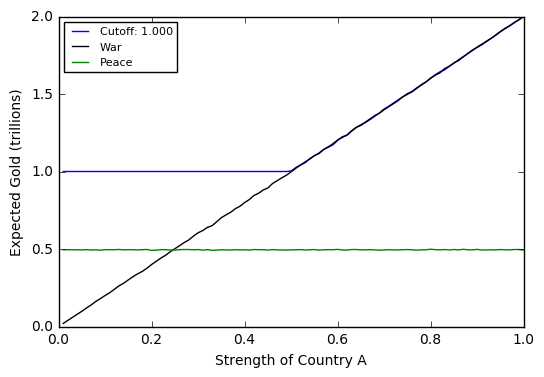

Runtime: 12.14 seconds


In [141]:
Game_Theory(loops = 2)

Repeating this iteration multiple times shows how the optimal cutoff point keeps shrinking, until eventually the expected return from choosing Peace has reached 0.

Since Peace has no expected value, both countries will always choose to go to war.

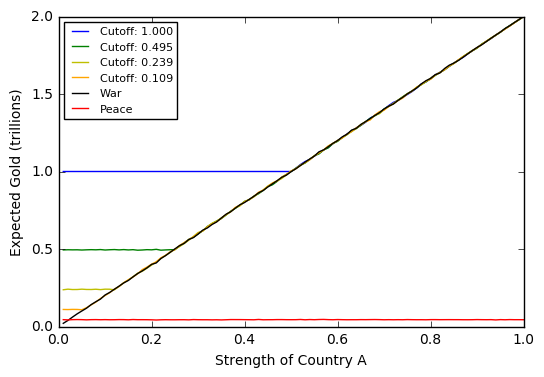

Runtime: 29.22 seconds


In [143]:
Game_Theory(loops = 5, sims = 100000)